Set up GRASS environment

In [1]:
import os
from IPython.display import Image
from helper import show_interactively, show
import grass.script as gs
# had to add shell = True to helper.py for this to work
from helper import initialize_GRASS_notebook
initialize_GRASS_notebook(binary='grass83',
                          grassdata="D:\\grassdata", location="FUTURES_zoning_prelim",
                          mapset="input")

In [ ]:
!g.extension r.sample.category
# r.object.geometry is r.neighborhoodmatrix
!g.extension r.neighborhoodmatrix

Import all data and set region to NC extent* and 30m resolution  
*data are imported at the NC extent in preparation for future simulations to be computed at the NC extent, for the purposes of this assignment I will be running simulations on a restricted area (see cell 6)

In [ ]:
# import data
!v.import input=D:\Zoning_Development\input_data\NCDOT_County_Boundaries.shp output=counties
# set region to NC counties and resolution to 30m 
!g.region -a vector=counties@input res=30
# roads
!v.import output=roads extent=region input=D:\Zoning_Development\input_data\tl_2021_37_prisecroads.shp layer=tl_2021_37_prisecroads
# rails
!v.import output=rails extent=region input=D:\Zoning_Development\input_data\tl_2021_us_rails.shp layer=tl_2021_us_rails
# protected areas
!v.import output=protected extent=region input=D:\Zoning_Development\input_data\PADUS3_0Combined_StateNC.shp layer=PADUS3_0Combined_StateNC
# slope
!r.import extent=region resolution=region input=D:\Zoning\DEM\DEM_output.tif output=DEM
!r.slope.aspect elevation=DEM@input slope=slope
# city boundaries
!v.import output=city_boundaries extent=region input=D:\Zoning_Development\input_data\NCDOT_City_Boundaries.shp layer=NCDOT_City_Boundaries
# intersections
!v.import output=interchanges extent=region input=D:\Zoning\interchanges\NC_interchange.shp layer=NC_interchange
# import all years of NLCD
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2021_land_cover_l48_20230630.img output=nlcd_2021
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2019_land_cover_l48_20210604.img output=nlcd_2019
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2016_land_cover_l48_20210604.img output=nlcd_2016
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2013_land_cover_l48_20210604.img output=nlcd_2013
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2011_land_cover_l48_20210604.img output=nlcd_2011
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2008_land_cover_l48_20210604.img output=nlcd_2008
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2006_land_cover_l48_20210604.img output=nlcd_2006
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2004_land_cover_l48_20210604.img output=nlcd_2004
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\nlcd_2001_land_cover_l48_20210604.img output=nlcd_2001
# import zoning data
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\zoning_core_reclass.tif output=zoning_core
!r.import extent=region resolution=region input=D:\Zoning_Development\input_data\zoning_sub_reclass.tif output=zoning_sub

Restrict extent to the counties of the Central Pines Regional Council (7 counties in the Triangle region in central NC)

In [2]:
# Change region to central pines area
!g.region vector=central_pines_regional_council@input res=30
# limiting extent to Central Pines Regional Council
!r.mask vector=central_pines_regional_council@input
# mask doesn't effect vectors so need to clip any vector data

Reading areas...
   0  14  28  42  57  71  85 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.


Reclassify land cover data as developed or undeveloped

In [ ]:
gs.mapcalc("urban_2001 = if(nlcd_2001 >= 21 && nlcd_2001 <= 24, 1, if(nlcd_2001 == 11 || nlcd_2001 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2004 = if(nlcd_2004 >= 21 && nlcd_2004 <= 24, 1, if(nlcd_2004 == 11 || nlcd_2004 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2006 = if(nlcd_2006 >= 21 && nlcd_2006 <= 24, 1, if(nlcd_2006 == 11 || nlcd_2006 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2008 = if(nlcd_2008 >= 21 && nlcd_2008 <= 24, 1, if(nlcd_2008 == 11 || nlcd_2008 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2011 = if(nlcd_2011 >= 21 && nlcd_2011 <= 24, 1, if(nlcd_2011 == 11 || nlcd_2011 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2013 = if(nlcd_2013 >= 21 && nlcd_2013 <= 24, 1, if(nlcd_2013 == 11 || nlcd_2013 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2016 = if(nlcd_2016 >= 20 && nlcd_2016 <= 24, 1, if(nlcd_2016 == 11 || nlcd_2016 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2019 = if(nlcd_2019 >= 20 && nlcd_2019 <= 24, 1, if(nlcd_2019 == 11 || nlcd_2019 >= 90 || protected, null(), 0))")
gs.mapcalc("urban_2021 = if(nlcd_2021 >= 20 && nlcd_2021 <= 24, 1, if(nlcd_2021 == 11 || nlcd_2021 >= 90 || protected, null(), 0))")

Convert relevant vector data to raster and calculate distance rasters

In [ ]:
!v.to.rast input=protected output=protected use=val
# !r.null map=protected null=0
# show('protected')
!r.null map=protected setnull=0
!r.grow.distance input=protected distance=dist_to_protected
!r.colors map=dist_to_protected color=gyr -e
show('dist_to_protected')

Reading raster map <wetland_2001>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output raster maps...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading raster map <wetland_2011>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output raster maps...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Reading raster map <wetland_2021>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output raster maps...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  

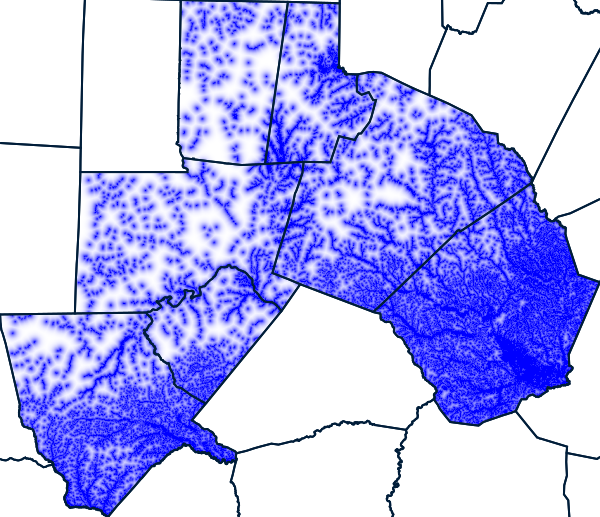

In [5]:
gs.mapcalc("wetland_2001 = if(nlcd_2001 == 90 || nlcd_2001 == 95, 1, null())")
gs.mapcalc("wetland_2011 = if(nlcd_2011 == 90 || nlcd_2011 == 95, 1, null())")
gs.mapcalc("wetland_2021 = if(nlcd_2021 == 90 || nlcd_2021 == 95, 1, null())")
!r.grow.distance input=wetland_2001 distance=dist_to_wetland_2001
!r.grow.distance input=wetland_2011 distance=dist_to_wetland_2011
!r.grow.distance input=wetland_2021 distance=dist_to_wetland_2021
!r.colors map=wetland_2001,dist_to_wetland_2011,wetland_2021 color=blues -en
show('dist_to_wetland_2011')

In [ ]:
!v.to.rast input=central_pines_regional_council type=area use=attr attribute_column=FIPS output=sa_counties

Reading raster map <water_2011>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output raster maps...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <dist_to_water_2011> set to 'blues'


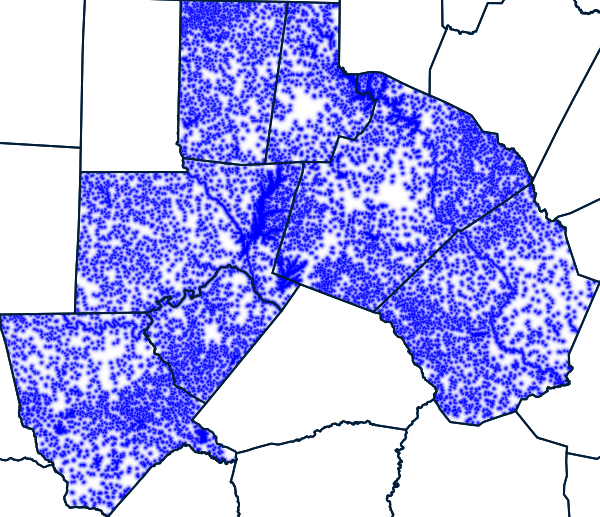

In [3]:
gs.mapcalc("water = if(nlcd_2021 == 11, 1, null())")
gs.mapcalc("water_2001 = if(nlcd_2001 == 11, 1, null())")
gs.mapcalc("water_2011 = if(nlcd_2011 == 11, 1, null())")
!r.grow.distance input=water distance=dist_to_water
!r.grow.distance input=water_2001 distance=dist_to_water_2001
!r.grow.distance input=water_2011 distance=dist_to_water_2011
!r.colors map=dist_to_water_2011,dist_to_water,dist_to_water_2001 color=blues -en
show('dist_to_water_2011')

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <ag_smooth> set to 'ndvi'
Color table for raster map <ag_2011_smooth> set to 'ndvi'
Color table for raster map <ag_2001_smooth> set to 'ndvi'


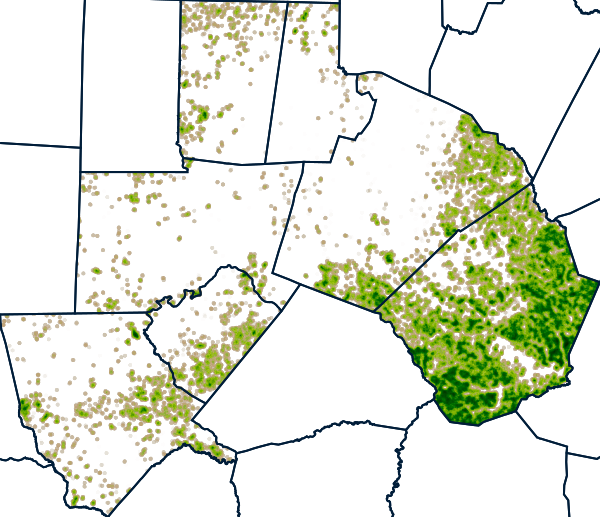

In [13]:
gs.mapcalc("agriculture = if(nlcd_2021 == 82, 1, 0)")
gs.mapcalc("agriculture_2011 = if(nlcd_2011 == 82, 1, 0)")
gs.mapcalc("agriculture_2001 = if(nlcd_2001 == 82, 1, 0)")
!r.neighbors input=agriculture output=ag_smooth size=37 method=average -c
!r.neighbors input=agriculture_2011 output=ag_2011_smooth size=37 method=average -c
!r.neighbors input=agriculture_2001 output=ag_2001_smooth size=37 method=average -c
!r.colors map=ag_smooth,ag_2011_smooth,ag_2001_smooth color=ndvi
show('ag_2011_smooth')

In [ ]:
gs.mapcalc("forest = if(nlcd_2021 >= 41 && nlcd_2021 <= 43, 1, 0)")
gs.mapcalc("forest_2011 = if(nlcd_2011 >= 40 && nlcd_2011 <= 43, 1, 0)")
gs.mapcalc("forest_2001 = if(nlcd_2001 >= 40 && nlcd_2001 <= 43, 1, 0)")
!r.neighbors input=forest output=forest_smooth size=37 method=average -c
!r.neighbors input=forest_2011 output=forest_2011_smooth size=37 method=average -c
!r.neighbors input=forest_2001 output=forest_2001_smooth size=37 method=average -c
!r.colors map=forest_smooth,forest_2001_smooth color=ndvi
show('forest_smooth')

In [4]:
gs.mapcalc("forest_2011 = if(nlcd_2011 >= 40 && nlcd_2011 <= 43, 1, 0)")
!r.neighbors input=forest_2011 output=forest_2011_smooth size=37 method=average -c

   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100


In [ ]:
!v.to.rast input=city_boundaries type=area use=val output=city_boundaries
!r.grow.distance input=city_boundaries distance=dist_to_city_boundaries
!v.to.rast input=interchanges type=point use=val output=interchanges
!r.grow.distance input=interchanges distance=dist_to_interchanges
show('dist_to_interchanges')

In [ ]:
!v.to.rast input=roads type=line use=val output=roads
!r.null map=roads null=0
!r.neighbors input=roads output=road_dens size=37 method=average -c --overwrite
show('road_dens')

Calculating development pressure based on urban development in 2001 and 2011

Preparing data...
Running development pressure filter...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map <tmp_futures_devPressure_21396_out>
Removing raster <tmp_futures_devPressure_21396_copy>
Removing raster <tmp_futures_devPressure_21396_nulls>
Removing raster <tmp_futures_devPressure_21396_out>
Preparing data...
Running development pressure filter...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing raster map <tmp_futures_devPressure_18760_out>
Removing raster <tmp_futures_devPressure_18760_copy>
Removing raster <tmp_futures_devPressure_18760_nulls>
Removing raster <tmp_futures_devPressure_18760_out>


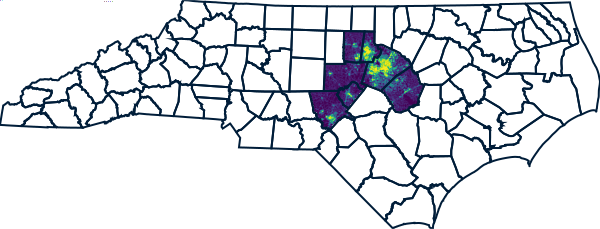

In [2]:
gs.mapcalc('urban_2001_nonull = if(isnull(urban_2001), 0, urban_2001)')
gs.mapcalc('urban_2011_nonull = if(isnull(urban_2011), 0, urban_2011)')
# remove mask
!r.mask -r
#TODO check these values
!r.futures.devpressure -n input=urban_2001_nonull output=devpressure_2001 method=gravity size=37 gamma=0.5 scaling_factor=0.1
!r.futures.devpressure -n input=urban_2011_nonull output=devpressure_2011 method=gravity size=37 gamma=0.5 scaling_factor=0.1
show('devpressure_2011')
# reset mask
!r.mask raster=sa_counties@input

Seperate out specific zoning districts and calculate distance rasters

In [ ]:
# Will first just try distance to each core zoning districts
# distance to residential
gs.mapcalc("residential = if(zoning_core == 1, 1, null())")
!r.grow.distance input=residential distance=dist_to_residential
# distance to non-res
gs.mapcalc("nonresidential = if(zoning_core == 2, 1, null())")
!r.grow.distance input=nonresidential distance=dist_to_nonresidential
# distance to mixed-use
gs.mapcalc("mixeduse = if(zoning_core == 3, 1, null())")
!r.grow.distance input=mixeduse distance=dist_to_mixeduse

# Then try distance to specific sub-district zones
# distance to medium-low, medium, or high-density residential
gs.mapcalc("high_den_residential = if(zoning_sub <= 120, 1, null())")
!r.grow.distance input=high_den_residential distance=dist_to_high_den_residential
# distance to low-density and agricultural residential
gs.mapcalc("low_den_residential = if(zoning_sub > 120 && zoning_sub < 200, 1, null())")
!r.grow.distance input=low_den_residential distance=dist_to_low_den_residential
# distance to industrial
gs.mapcalc("industrial = if(zoning_sub == 201, 1, null())")
!r.grow.distance input=industrial distance=dist_to_industrial
# distance to commercial
gs.mapcalc("commercial = if(zoning_sub == 200, 1, null())")
!r.grow.distance input=commercial distance=dist_to_commercial
# distance to planned development
gs.mapcalc("planned_dev = if(zoning_sub == 301, 1, null())")
!r.grow.distance input=planned_dev distance=dist_to_planned_dev
# distance to downtown
gs.mapcalc("downtown = if(zoning_sub == 302, 1, null())")
!r.grow.distance input=downtown distance=dist_to_downtown

Check range of values in all predictors to determine if rescaling is necessary

In [14]:
for name in ['slope', 'dist_to_water', 'dist_to_water_2001', 'dist_to_water_2011', 'dist_to_wetland_2021','dist_to_wetland_2011','dist_to_wetland_2001',
             'dist_to_protected', 'forest_smooth', 'forest_2001_smooth', 'forest_2011_smooth', 'dist_to_city_boundaries', 'dist_to_interchanges',
             'road_dens', 'devpressure_2001', 'devpressure_2011',
             'ag_smooth', 'ag_2001_smooth', 'ag_2011_smooth', 
             'dist_to_downtown', 'dist_to_planned_dev', 'dist_to_commercial', 'dist_to_industrial', 
             'dist_to_low_den_residential', 'dist_to_high_den_residential', 'dist_to_mixeduse',
             'dist_to_nonresidential', 'dist_to_residential']:
    minmax = gs.raster_info(name)
    print (name, minmax['min'], minmax['max'])

slope 0.0 53.88638
dist_to_water 0.0 449849.840946954
dist_to_water_2011 0.0 46506.8601732011
dist_to_wetland_2021 0.0 46566.3877228458
dist_to_wetland_2011 0.0 46566.3877228458
dist_to_wetland_2001 0.0 46566.3877228458
dist_to_protected 0.0 449931.227744863
forest_smooth 0.0 1.0
forest_2001_smooth 0.0 1.0
forest_2011_smooth 0.0 1.0
dist_to_city_boundaries 0.0 451068.702971066
dist_to_interchanges 0.0 456713.285223892
road_dens 0.0 1.0
devpressure_30_05_01_2001 0.0 93.95252
devpressure_30_05_01_2011 0.0 93.95252
ag_smooth 0.0 1.0
ag_2001_smooth 0.0 1.0
ag_2011_smooth 0.0 1.0
dist_to_downtown 0.0 489448.689854207
dist_to_planned_dev 0.0 500901.781689784
dist_to_commercial 0.0 460028.061426692
dist_to_industrial 0.0 463507.682460604
dist_to_low_den_residential 0.0 452193.702963675
dist_to_high_den_residential 0.0 449839.248287652
dist_to_mixeduse 0.0 467212.824524327
dist_to_nonresidential 0.0 459879.825389199
dist_to_residential 0.0 449839.248287652


rescale based on results

In [ ]:
gs.mapcalc("dist_to_water_km = dist_to_water / 1000")
gs.mapcalc("dist_to_water_2001_km = dist_to_water_2001 / 1000")
gs.mapcalc("dist_to_water_2011_km = dist_to_water_2011 / 1000")
gs.mapcalc("dist_to_wetland_2021_km = dist_to_wetland_2021 / 1000")
gs.mapcalc("dist_to_wetland_2011_km = dist_to_wetland_2011 / 1000")
gs.mapcalc("dist_to_wetland_2001_km = dist_to_wetland_2001 / 1000")
gs.mapcalc("dist_to_protected_km = dist_to_protected / 1000")
gs.mapcalc("dist_to_city_boundaries_km = dist_to_city_boundaries / 1000")
gs.mapcalc("dist_to_interchanges_km = dist_to_interchanges / 1000")
gs.mapcalc("road_dens_perc = road_dens * 100")
gs.mapcalc("forest_smooth_perc = forest_smooth * 100")
gs.mapcalc("forest_2011_smooth_perc = forest_2011_smooth * 100")
gs.mapcalc("forest_2001_smooth_perc = forest_2001_smooth * 100")
gs.mapcalc("ag_smooth_perc = ag_smooth * 100")
gs.mapcalc("ag_2011_smooth_perc = ag_2011_smooth * 100")
gs.mapcalc("ag_2001_smooth_perc = ag_2001_smooth * 100")
gs.mapcalc("dist_to_downtown_km = dist_to_downtown / 1000")
gs.mapcalc("dist_to_planned_dev_km = dist_to_planned_dev / 1000")
gs.mapcalc("dist_to_commercial_km = dist_to_commercial / 1000")
gs.mapcalc("dist_to_industrial_km = dist_to_industrial / 1000")
gs.mapcalc("dist_to_low_den_residential_km = dist_to_low_den_residential / 1000")
gs.mapcalc("dist_to_high_den_residential_km = dist_to_high_den_residential / 1000")
gs.mapcalc("dist_to_mixeduse_km = dist_to_mixeduse / 1000")
gs.mapcalc("dist_to_nonresidential_km = dist_to_nonresidential / 1000")
gs.mapcalc("dist_to_residential_km = dist_to_residential / 1000")

Double check if rescaling was successful

In [11]:
for name in ['dist_to_water_km', 'dist_to_water_2001_km', 'dist_to_water_2011_km', 'dist_to_wetland_2021_km', 'dist_to_wetland_2011_km', 'dist_to_wetland_2001_km',
             'dist_to_protected_km','forest_smooth_perc', 'forest_2011_smooth_perc', 'forest_2001_smooth_perc',
             'dist_to_city_boundaries_km','dist_to_interchanges_km','road_dens_perc',
             'dist_to_downtown_km','dist_to_planned_dev_km','dist_to_commercial_km','dist_to_industrial_km',
             'dist_to_low_den_residential_km','dist_to_high_den_residential_km','dist_to_mixeduse_km',
             'dist_to_nonresidential_km','dist_to_residential_km']:
    minmax = gs.raster_info(name)
    print (name, minmax['min'], minmax['max'])

dist_to_water_km 0.0 3.7589892258425
dist_to_water_2011_km 0.0 3.72504984019261
dist_to_wetland_2021_km 0.0 4.41966867249477
dist_to_wetland_2011_km 0.0 5.31838558917484
dist_to_wetland_2001_km 0.0 5.31838558917484
dist_to_protected_km 0.0 19.6379046743791
forest_smooth_perc 0.0 100.0
forest_2011_smooth_perc 0.0 100.0
forest_2001_smooth_perc 0.0 100.0
dist_to_city_boundaries_km 0.0 17.5357121326737
dist_to_interchanges_km 0.0 20.0731163499841
road_dens_perc 0.0 15.1635282457879
dist_to_downtown_km 0.0 58.208512264101
dist_to_planned_dev_km 0.0 61.387250304929
dist_to_commercial_km 0.0 18.5894728273827
dist_to_industrial_km 0.0 30.2874776103921
dist_to_low_den_residential_km 0.0 49.7154402575297
dist_to_high_den_residential_km 0.0 4.60184745509888
dist_to_mixeduse_km 0.0 38.853474748084
dist_to_nonresidential_km 0.0 18.2062434346023
dist_to_residential_km 0.0 3.25676219580122


In [3]:
gs.mapcalc("urban_change_01_11 = if(urban_2011 == 1, if(urban_2001 == 0, 1, null()), 0)")

Sample rasters

In [19]:
core_district = 'dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km'
# sub-district zones
sub_district = 'dist_to_downtown_km,dist_to_planned_dev_km,dist_to_commercial_km,dist_to_industrial_km,dist_to_low_den_residential_km,dist_to_high_den_residential_km'
# without zoning
parameters = 'devpressure_2001,slope,road_dens_perc,forest_2001_smooth_perc,ag_2001_smooth_perc,dist_to_water_2001_km,dist_to_wetland_2001_km,dist_to_protected_km,dist_to_city_boundaries_km'
# with core and sub zoning districts
all_parameters = ",".join(['sa_counties', parameters, core_district, sub_district])
all_parameters

'sa_counties,devpressure_30_05_01_2001,slope,road_dens_perc,forest_2001_smooth_perc,ag_2001_smooth_perc,dist_to_water_2001_km,dist_to_wetland_2001_km,dist_to_protected_km,dist_to_city_boundaries_km,dist_to_mixeduse_km,dist_to_nonresidential_km,dist_to_residential_km,dist_to_downtown_km,dist_to_planned_dev_km,dist_to_commercial_km,dist_to_industrial_km,dist_to_low_den_residential_km,dist_to_high_den_residential_km'

In [20]:
gs.run_command('r.sample.category', input='urban_change_01_11', output='sampling',
               sampled=all_parameters,
               npoints=[1000, 400])